- <https://kkokkal.tistory.com/1326>

In [1]:
from math import log

import cv2
import gc
import glob
import matplotlib.pyplot as plt
import numpy as np
import os

19

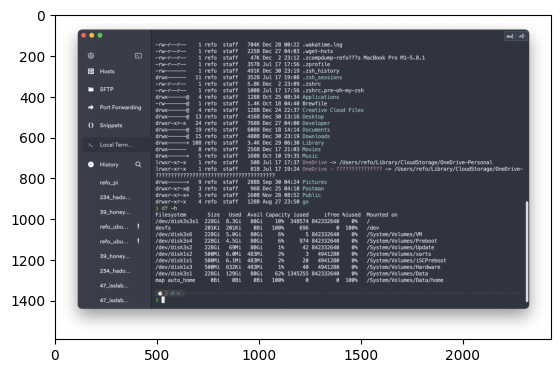

In [2]:
input_path = './samples/Nord Dark.png'

image_bgra = cv2.imread(input_path, cv2.IMREAD_UNCHANGED)
image_rgba = cv2.cvtColor(image_bgra, cv2.COLOR_BGRA2RGBA)
plt.imshow(image_rgba)
gc.collect()

3423

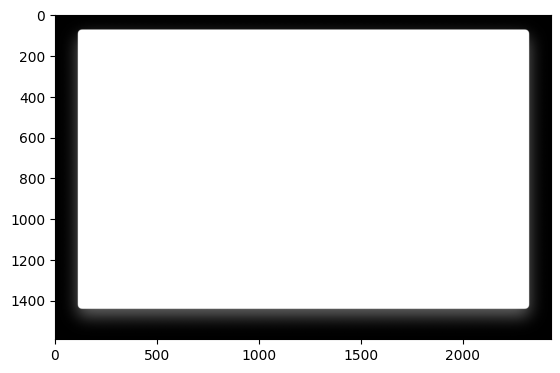

In [3]:
# preserve alpha channel
alpha = image_bgra[:,:,3]
alpha_rgb = cv2.cvtColor(alpha, cv2.COLOR_BGRA2RGBA)
plt.imshow(alpha_rgb)
gc.collect()

3423

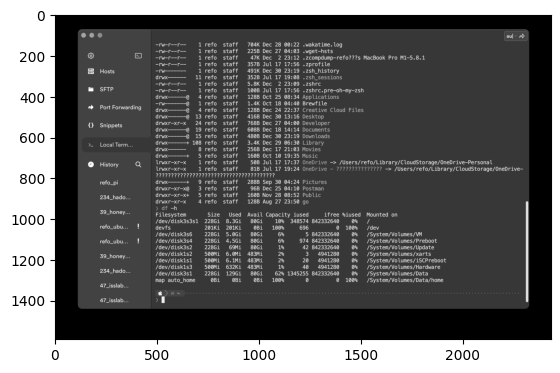

In [4]:
# to make terminal capture image into light mode while keeping the colour data,
# invert lightness channel in hls color model
image_hls = cv2.cvtColor(image_bgra, cv2.COLOR_BGR2HLS)
h, l, s = cv2.split(image_hls)
plt.imshow(cv2.merge([l,l,l]))
gc.collect()

3423

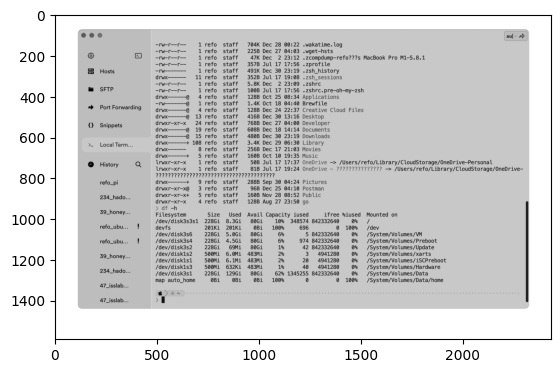

In [5]:
# invert L channel
l_new = 255 - l
plt.imshow(cv2.merge([l_new, l_new, l_new]))
gc.collect()

3428

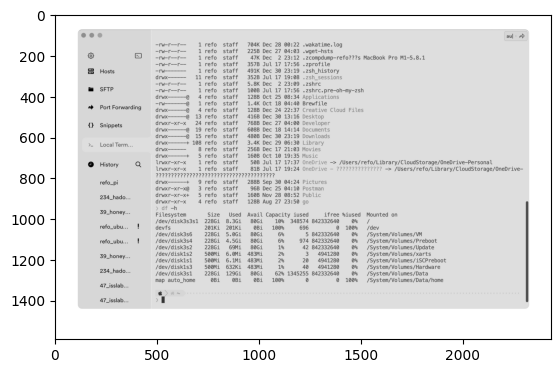

In [6]:
# little lighten
gamma = 1.8
inv_gamma = 1. / gamma

l_new = l_new.astype(np.float_)
l_new = ((l_new/255) ** inv_gamma) * 255
l_new = l_new.astype(np.uint8)

plt.imshow(cv2.merge([l_new, l_new, l_new]))
gc.collect()

3418

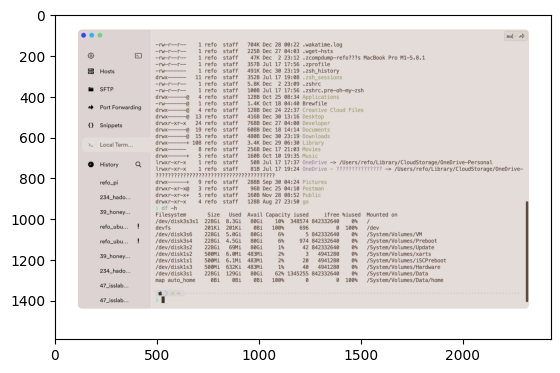

In [7]:
# merge inverted l channel to make new image
image_hls_new = cv2.merge([h, l_new, s])
image_bgra_new = cv2.cvtColor(cv2.cvtColor(image_hls_new, cv2.COLOR_HLS2BGR), cv2.COLOR_BGR2BGRA)

# revert alpha channel
image_bgra_new[:,:,3] = alpha

plt.imshow(image_bgra_new)
gc.collect()

In [8]:
# cv2 export in bgr colour mode
out_path = input_path.replace('.png', '_d2l.png')
cv2.imwrite(out_path, image_bgra_new)

True

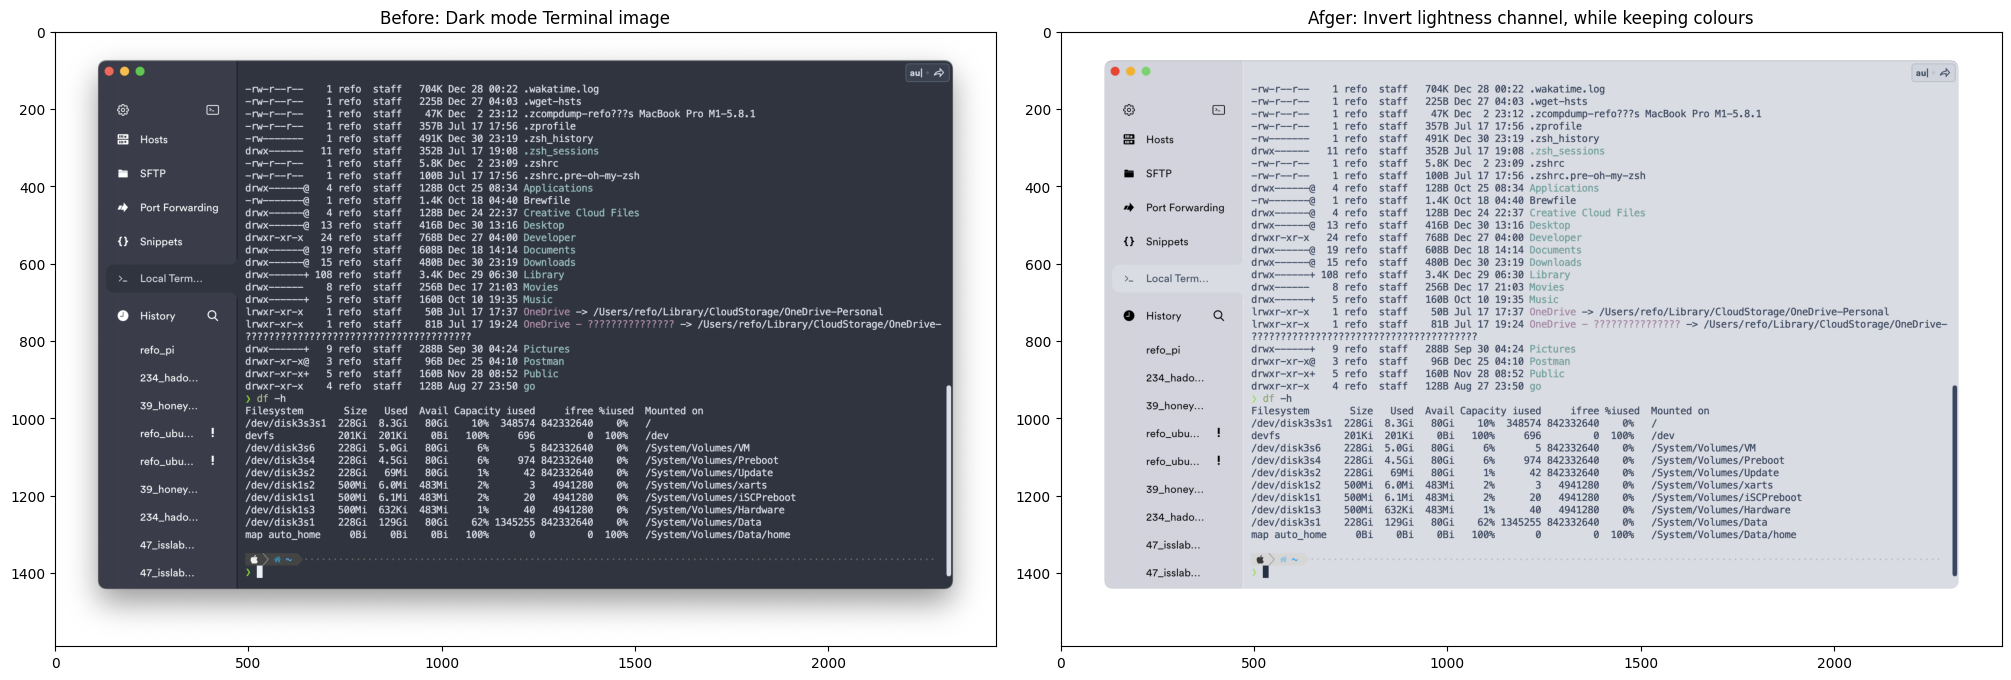

3443

In [9]:
image_rgba_new = cv2.cvtColor(image_bgra_new, cv2.COLOR_BGRA2RGBA)

fig, axes = plt.subplots(1, 2, figsize=(20, 7), constrained_layout=True)
image_rgba = cv2.cvtColor(image_bgra, cv2.COLOR_BGRA2RGBA)

axes[0].set_title("Before: Dark mode Terminal image")
axes[0].imshow(image_rgba)

axes[1].set_title("Afger: Invert lightness channel, while keeping colours")
axes[1].imshow(image_rgba_new)

plt.show()
plt.close(fig)
gc.collect()